### Homework 1

This homework will familiarize you with some of the skills we'll need in the rest of the course.

Please answer the questions in this worksheet in the provided cells.

Some answers might require you to shift to Markdown mode if a text based answer is required.  If mathematical symbols are needed in an answer please use $\LaTeX$.  If you aren't sure how, it might be helpful to look at the source for the questions themselves by double clicking.  There is a lot of info on $\LaTeX$ online.  [This](http://www.malinc.se/math/latex/basiccodeen.php) might be helpful.

If a code based answer is needed be sure that your cell is in Code mode.  

Feel free to collaborate on this project, but please limit team sizes to 3 and acknowledge your collaborators.  

**Due 2/14/19**


#### Question 1

Suppose $f(x,y,z,a,b,c) = \frac{1}{1+exp(ax + by + cz)}$, where $exp()$ is alternative notation for the exponential function $e^x$.  (This question uses partial derivatives.  If you are unfamiliar with partial derivatives you can watch [this](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/partial-derivatives/v/partial-derivatives-introduction) short video).

1. What is $\frac{\partial f}{\partial a}$?
1. If $w = f(x,y,z,a,b,c)$, show that $\frac{\partial f}{\partial a} = xw\cdot(w-1)$.
1. Let $\nabla_{abc} f$ denote the vector $\langle \frac{\partial f}{\partial a},\frac{\partial f}{\partial b},\frac{\partial f}{\partial c} \rangle ^ T$. (If you aren't sure what $T$ means, please read [this](https://en.wikipedia.org/wiki/Row_and_column_vectors). By default all our vectors are column vectors.  If you've never encountered the gradient before you can watch [this](https://www.khanacademy.org/math/multivariable-calculus/multivariable-derivatives/gradient-and-directional-derivatives/v/gradient) video.)
    1. Write an expression for $\nabla_{abc} f$ by evaluating all the partial derivatives.
    1. What is $\nabla_{abc} f$ (as a vector of real numbers) if $x=y=z=a=b=c=1$?


### 1
$-\frac{x*exp(ax+by+cz)}{(exp(ax+by+cz) + 1)^2}$

### 2

x$\frac{1}{1 + exp(ax+by+cz)} * (\frac{1}{1 + exp(ax+by+cz)} - 1)$


$\frac{1}{(1 + exp(ax+by+cz)^2)} - \frac{x}{1 + exp(ax+by+cz)}$



### 3

3.1 $\nabla_{abc}$ f = $\langle -\frac{x*exp(ax+by+cz)}{(exp(ax+by+cz) + 1)^2},-\frac{y*exp(ax+by+cz)}{(exp(ax+by+cz) + 1)^2},-\frac{z*exp(ax+by+cz)}{(exp(ax+by+cz) + 1)^2} \rangle ^ T$

3.2 $\nabla_{abc}$ f = $\langle -\frac{e}{(e + 1)^2},-\frac{e}{(e + 1)^2},-\frac{e}{(e + 1)^2} \rangle ^ T$

#### Question 2

This is a question about [matrix multiplication](https://www.khanacademy.org/math/precalculus/precalc-matrices/multiplying-matrices-by-matrices/v/multiplying-a-matrix-by-a-matrix).  Feel free to use numpy to help with the multiplications. [Here](https://web.stanford.edu/class/cs231a/section/section1.pdf) is a nice review/summary of linear algebra, and how to do it in python.

Suppose 

$ M = \left ( \begin{matrix}1 & 2 & 3\\4 & 5 &6\end{matrix} \right )$

1.  What is $MM^T$?
1.  What is $M^T(MM^T)$?
1.  What is $(MM^T)^{-1}$?
1.  Let $H = M^T(MM^T)^{-1}M$.  Verify that $H$ is symmetric ($H = H^T$) and that $H^2 = H$.
1.  If $w = \langle 7,8,9 \rangle ^T$, then what is $Mw$?

In [18]:
import numpy as np

M = [1,2,3,4,5,6]
M = np.array(M)
M = M.reshape(2,3)
Mt = M.T
#1.
MMt = M.dot(Mt)
MMt = np.array(MMt)
#2
Mt.dot(MMt) 
#3. 
MMtinv = np.linalg.inv(MMt)
#4. 
H = (Mt.dot(MMtinv)).dot(M)
H = np.array(H)
H.shape = H.T.shape
H.shape == H.T.shape # true
H**2 == H # false
# 5.
w = [7,8,9]
w = np.array(w)
w = w.T
M*w


array([[ 7, 16, 27],
       [28, 40, 54]])

#### Question 3

Consider the string $S$ defined in the cell below (borrowed from the _New York Times_).  Please process this string in the following ways.  ([This tutorial](https://www.linode.com/docs/development/python/string-manipulation-python-3/) might be helpful.) Please make the result of each part clear and easy to see.

1. Convert the string to only lowercase letters (let the result be called $S_1$). (Hint:  there is a built-in string method that does this)
1. Remove all non-alphabetical characters from $S_{1}$ except for spaces (let the result be called $S_2$).
1. Use the `split()` method on $S_2$ to produce a list $L$ of words occurring in $S$.
1. By using the python `set` type, produce a set $W$ of all the unique words occurring in $L$.  What is the ratio of the length of $W$ to the length of $L$?
1. Use $W$ to produce a list $WS$ of the words in $W$ occurring in sorted order.
1. Create a function `word_vector(WS,L)` that takes $WS$ and $L$ as input and returns a numpy array $N$ of length `len(WS)` such that for each $i$ in `range(len(WS))`, $N[i]$ is equal to the number of times the word $WS[i]$ occurs in $L$.
1. Create a function `cos_sim(N,M)` that computes the [cosine similarity](http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/) of two word vectors (two outputs from `word_vector` called $N$ and $M$).

In [59]:
import regex as re
import numpy as np

#6.
def word_vector(WS,L):
    N = [0]*len(WS) # create a list of 0 for each N
    N = np.array(N)
    for i in range(len(WS)):
        for k in L:
            if WS[i] == k:
               N[i] += 1
    return N

#7.
def cos_sim(N,M):
    cos = (N.dot(M)) / ((np.sqrt(N.dot(N))) * np.sqrt(M.dot(M)))
    # cosine similarty
    # dot product of both matrices over the product of the square root of the dot product of their own matrix
    print(cos)
    
S = """A deep, brutal cold set in across the Midwest on Wednesday, sending temperatures plummeting to depths that stunned even Midwesterners, a group accustomed to shrugging off winter. The cold that seized the middle of the country was the sort that makes cars moan, that makes breathing hurt, that makes any bit of exposed skin sting.

Cities like Chicago had been preparing for the deep freeze for days, so when it arrived, much of life had come to a standstill. Colleges and schools were closed all around, and even the United States Postal Service had stopped deliveries in some places. Workers were sent home, meetings canceled, parties called off.

And the worst of the blast was still to come: Forecasters said temperatures would drop again after sunset on Wednesday, and that Chicago might even break its record low of minus 27. The outlook for Thursday was different but still grim: slightly warmer temperatures — and snow."""

#using regular expression to get rid of punctuation
#1.
S1 = S.lower()
#2.
S2 = re.sub("\n", " ", S1) # get rid of newline character
S2 = re.sub("[,.!?:—\n]", "", S1) # match punctuation, replace with nothing
#3.
L = S2.split()
#4.
W = list(set(L))
print("W is %i and L is %i " % (len(W), len(L)))
#5.
WS = W
WS.sort()
#6
N = word_vector(WS,L)
#7
cos_sim(N,N) # = .9999999999999999999999999

W is 105 and L is 152 
0.9999999999999999


#### Question 4

1. Use `matplotlib` to make a plot of $y=x^2$.
1. Use `matplotlib` to make a plot of a [cycloid](https://en.wikipedia.org/wiki/Cycloid). 
1. Use `matplotlib` to make a [contour plot](http://snowball.millersville.edu/~adecaria/ESCI386P/esci386-lesson13-2Dplots.pdf) of the equation $z = y\cdot \sin(x) - x\cdot \sin(y)$.

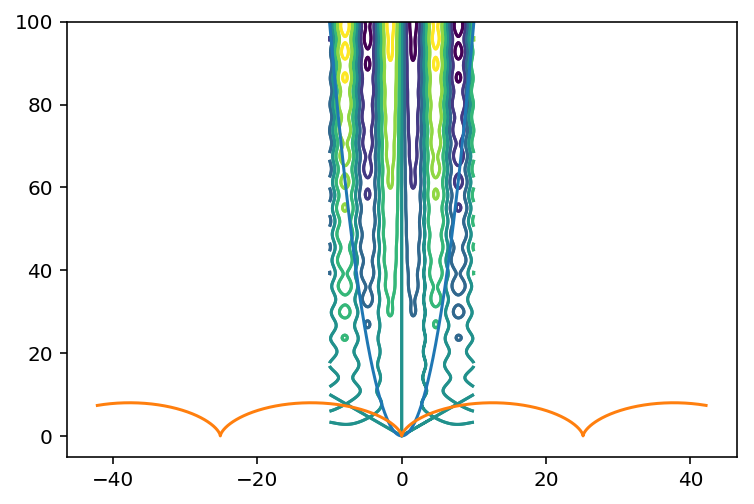

In [83]:
import matplotlib.pyplot as plt
import numpy as np
#1.
x = np.linspace(-10,10,1000)
y = x**2

plt.plot(x,y)

#2. 
r = 4 # radius
t = np.linspace(-10,10,1000)
a = r*(t-np.sin(t))
b = r*(1 - np.cos(t))

plt.plot(a,b)

#3.
c = np.linspace(-10,10,10)
d = np.linspace(-10,10,10)
C,D = np.meshgrid(x,y)
e = C * np.sin(D) - D * np.sin(C)

plt.contour(C,D,e)
plt.show()


#### Question 5

Do Assessment (2) from the Lecture 1 on the syllabus (reproduced below).  Please produce a scatter plot for 2,2a, and 2b. (Hint: [this](https://en.wikipedia.org/wiki/Unit_square) is what "unit square" means. [This](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.randn.html) may also be helpful.)

    2.  Generate 100 points in the unit square, uniformly at random.
    2a. Distributed normally (mu = 0.5, sigma=1) on the x axis, but uniformly on the y axis.
    2b. Distributed normally (mu = 0.5, sigma=1) on both the x and y axis.
    2c. Produce a 2d histogram for this data.  

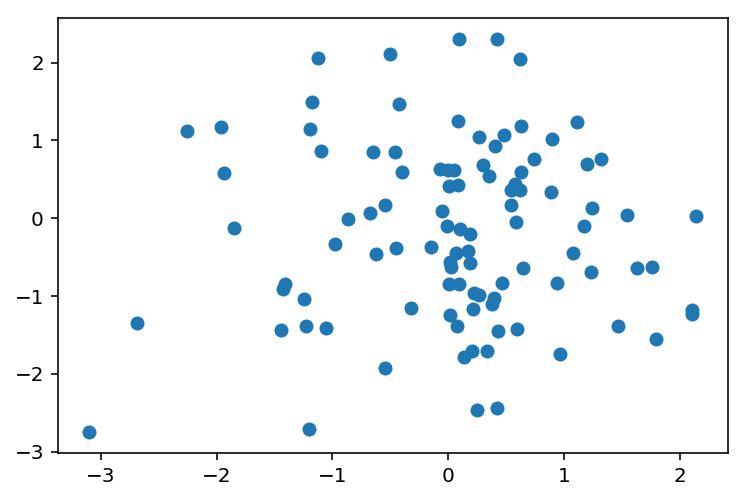

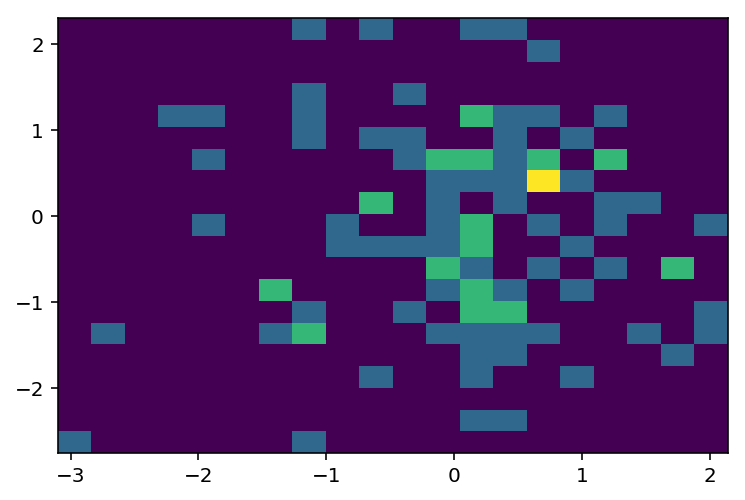

In [101]:
import numpy as np
import matplotlib.pyplot as plt
mu = .5
sigma = 1
#2.
x= np.random.randn(100)
y = np.random.randn(100)
plt.scatter(x,y)
plt.show()
plt.hist2d(x, y, bins=(20, 20))
plt.show()


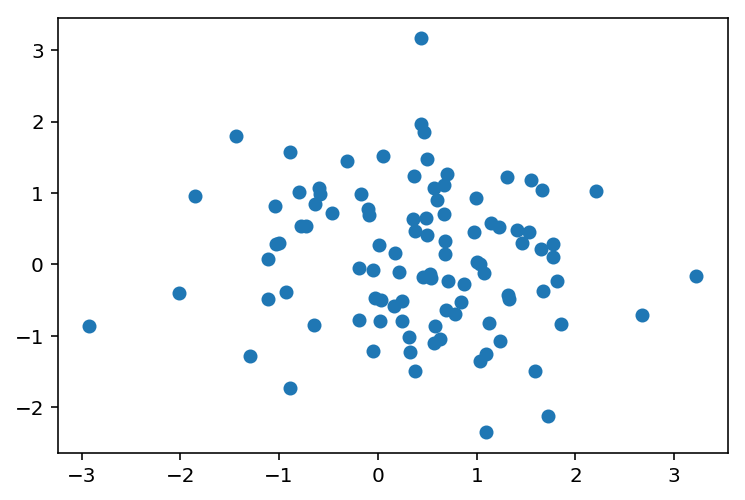

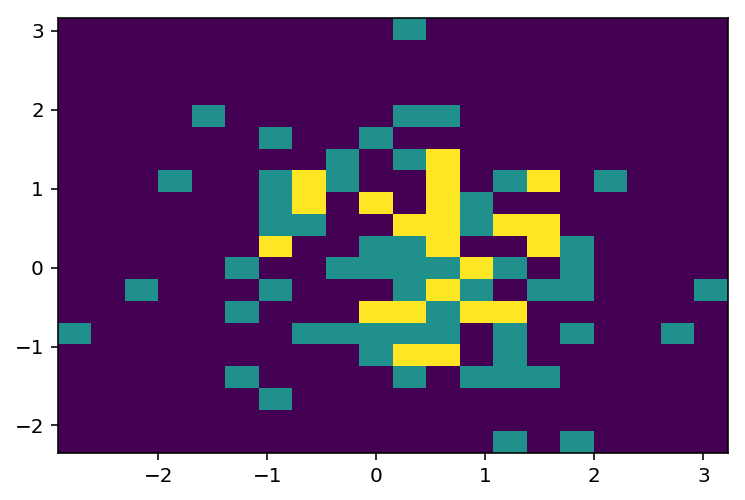

In [102]:
import numpy as np
import matplotlib.pyplot as plt
mu = .5
sigma = 1
#2a
x = sigma * np.random.randn(100) + mu
y = np.random.randn(100)
plt.scatter(x,y)
plt.show()
plt.hist2d(x, y, bins=(20, 20))
plt.show()

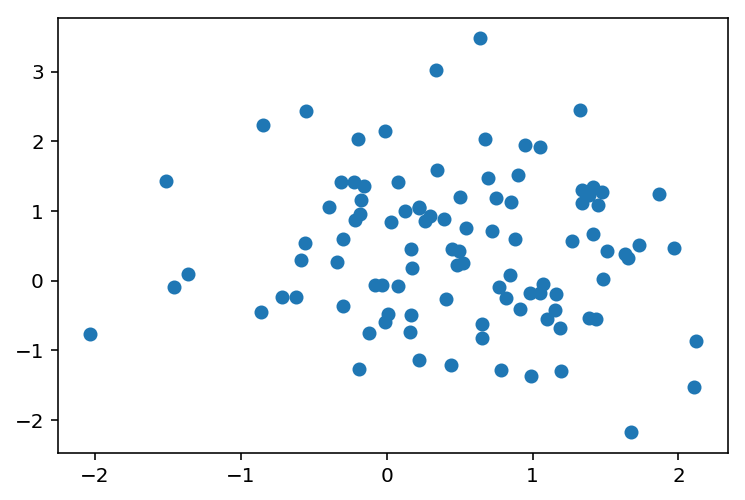

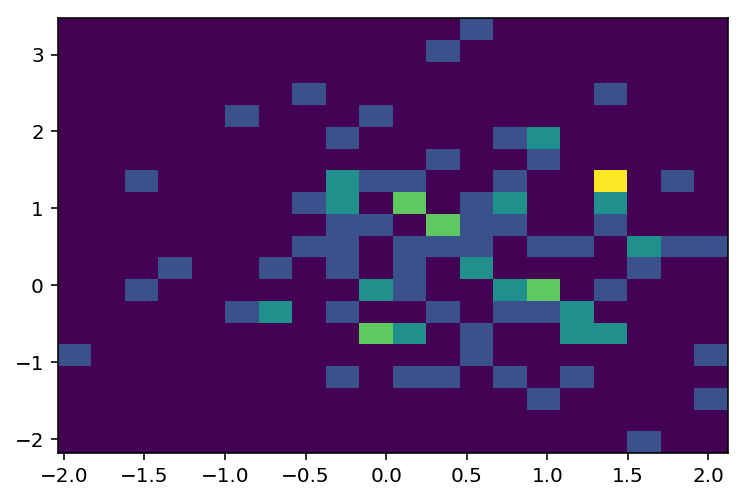

In [105]:
import numpy as np
import matplotlib.pyplot as plt
mu = .5
sigma = 1
#2b
x = sigma * np.random.randn(100) + mu
y = sigma * np.random.randn(100) + mu
plt.scatter(x,y)
plt.show()
plt.hist2d(x, y, bins=(20, 20))
plt.show()